# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de **regresión** con el conjunto de datos *Boston House Prices Dataset*.

Estudiarán el dataset, harán visualizaciones, y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

**Breve estudio del DataSet**

In [3]:
boston.data.shape # Matriz con los datos de entrada (atributos)

(506, 13)

In [4]:
len(boston.target) # Vector de valores a predecir

506

In [5]:
list(boston.feature_names) # Nombres de los atributos para cada columna de 'data'

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [6]:
print(boston.DESCR) # Descripción del dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en *80%* para entrenamiento, y *20%* para evaluación.

In [7]:
from sklearn.model_selection import train_test_split

X, y = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina usted que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc.? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

**Respuestas**


1.  El conjunto de datos contiene información recopilada por el *Servicio de Censos* de *Estados Unidos*. con respecto a la vivienda en el área de *Boston Mass*.
    Los datos fueron publicados originalmente por *Harrison* y *Rubinfeld*, **«Hedonic prices and the demand for clean air»**, en el año **1978**.
    Cada entrada del conjunto de datos describe un suburbio o pueblo en Boston.


2.  La variable a predecir es `MEDV`.
    Representa el valor medio de las viviendas ocupadas por sus propietarios, en unidad de mil dólares


3.  En total, hay **13** variables disponibles para realizar la predicción.
    - `CRIM` Tasa de criminalidad per cápita por ciudad.
    - `ZN` Proporción de terreno residencial, dividido en zonas, para lotes de más de 25,000 pies cuadrados.
    - `INDUS` Proporción de acres comerciales no minoristas por ciudad.
    - `CHAS` Variable *dummy* de *Charles River*, indica limitación con el río.
    - `NOX` Concentración de óxidos nítricos (partes por 10 millones).
    - `RM` Número medio de habitaciones por vivienda.
    - `AGE` Proporción de propiedades ocupadas por sus propietarios, construidas antes de 1940.
    - `DIS` Distancias ponderadas a cinco centros de empleo de Boston.
    - `RAD` Índice de accesibilidad a carreteras radiales.
    - `TAX` Tasa de impuesto a la propiedad de valor total por diez mil dólares.
    - `PTRATIO` Proporción de alumno / maestro por ciudad.
    - `B` Proporción de personas negras por ciudad.
    - `LSTAT` Proporción de personas pobres por ciudad.


4. A simple vista, y sin haber estudiado la distribución de las variables, imaginamos que los atributos más determinantes serían `CRIM` (medida sobre la inseguridad), `DIS` (posibilidades de obtener un empleo), `TAX` (cantidad de impuestos), y `B` (en esa época, el racismo era corriente).


5. Es inmediato notar la inclusión de las variables `B` y `LSTAT`. Claramente estos atributos pueden ser causantes de dilemas éticos.

**Convertimos nuestro DataSet a un DataFrame**

In [8]:
# Initializing the dataframe
df = pd.DataFrame(boston.data)

# Adding the feature names to the dataframe
df.columns = boston.feature_names

# Adding target variable to dataframe
df['MEDV'] = boston.target 

# Check the shape of dataframe
df.shape

(506, 14)

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# Viewing the data statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. ¿Para usted, cuáles son esos atributos? Lístelos en orden de importancia.

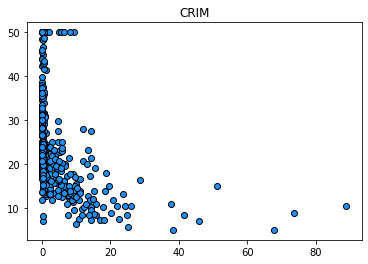

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)

plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

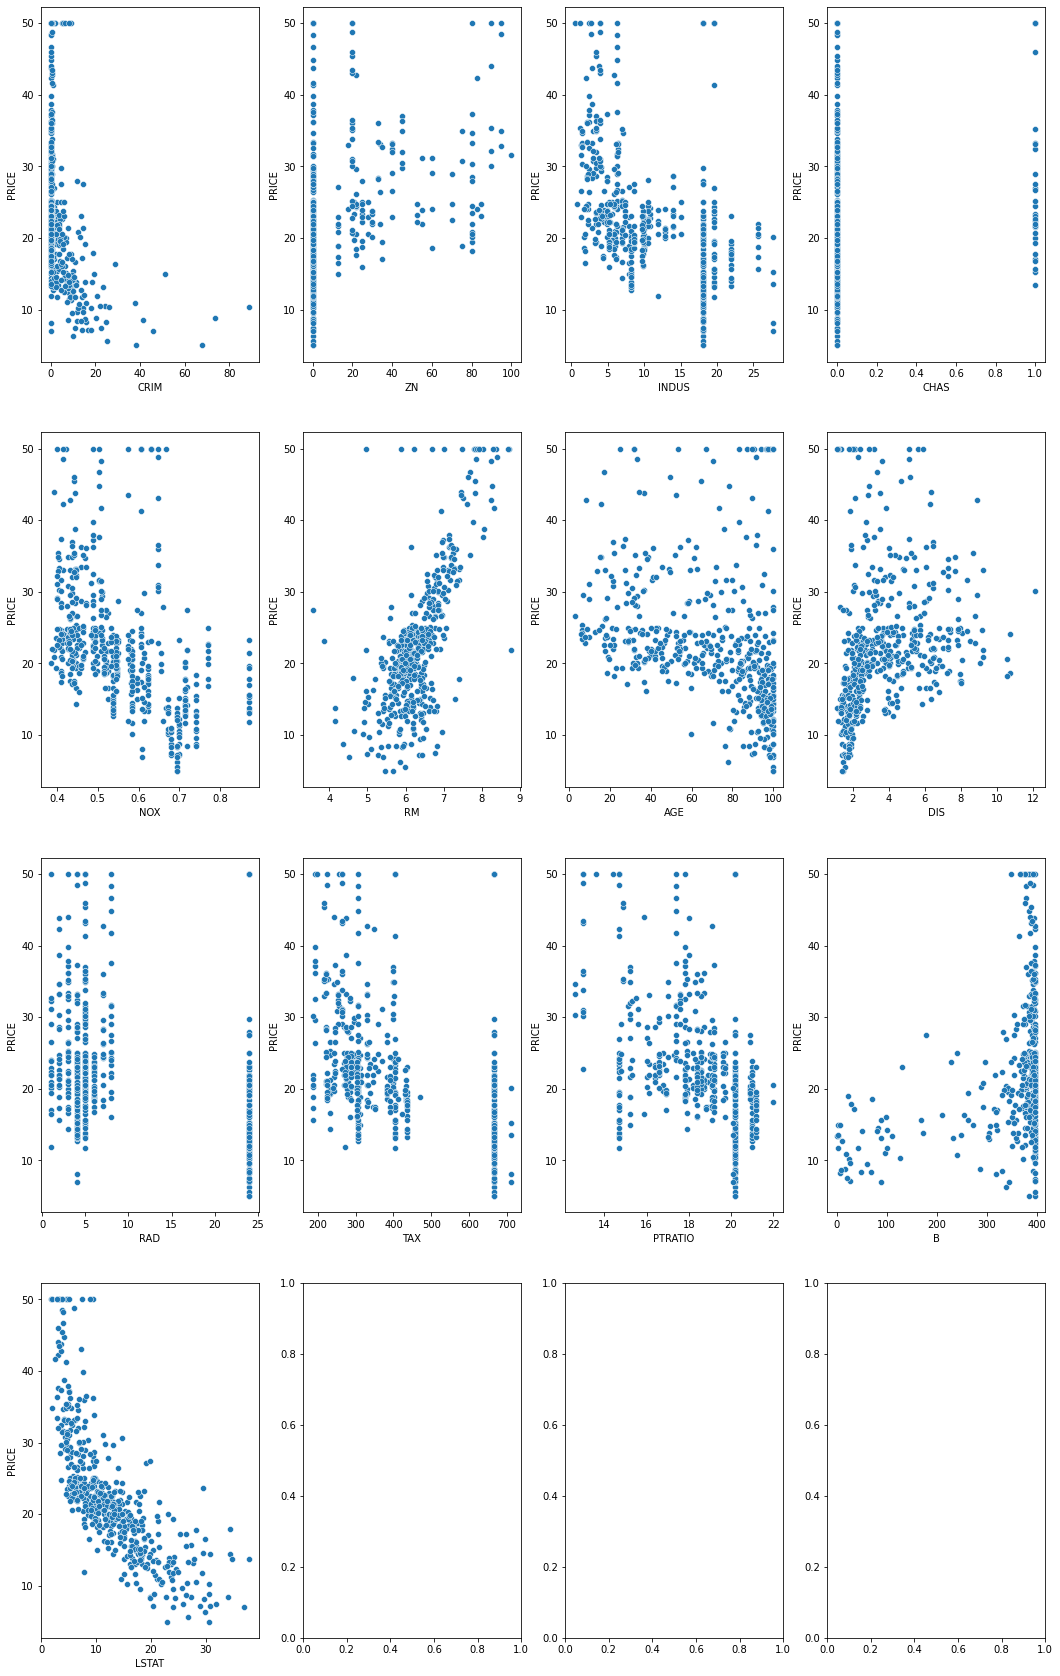

In [ ]:
import math
import seaborn

features = list(boston.feature_names)

# Create general layout
n_cols = 4
n_rows = 4

fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 30))

for i, f in enumerate(features):
    # Calculamos filas y columnas
    row = math.floor(i / n_cols)
    col = i % n_cols
    # Configuramos visualización
    ax = axs[row, col]
    
    selector = (boston['feature_names'] == f)
    #plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")#, axis=ax)
    seaborn.scatterplot(data=df, x=f, y='PRICE', ax=ax)
    #plt.title(f)
    #plt.show()
    #ax.imshow(p)#, interpolation='bilinear')
    #ax.axis('off')
    #ax.set_title(':)')
    #ax.imshow(wc, interpolation='bilinear')
    #ax.axis('off')
    #ax.set_title(area)
    #, ax=axes[index]

    
# Limpiamos subplots vacíos
#for col in range(n_cols):
#    for row in range(n_rows):
#        if not axs[row, col].lines:
#            axs[row, col].axis('off')

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
# 1. Resolver acá. Ayuda:
feature = 'CRIM'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
# 2. Instanciar y entrenar acá.

In [ ]:
# 3. Predecir y evaluar acá.

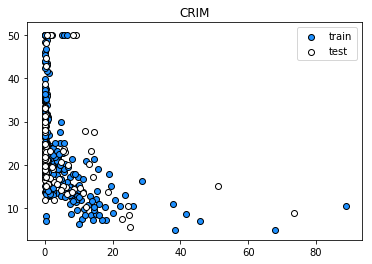

In [ ]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

In [ ]:
# 1. Resolver acá. Ayuda:
feature = 'RM'  # selecciono el atributo 'RM'
selector = (boston['feature_names'] == feature)

X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
X_train_f[0]

array([6.951])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(1) # Polinomio de grado 1
pf.fit(X_train_f)            # No necesita y_train

PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
X_trainP = pf.transform(X_train_f)

X_trainP.shape

(404, 2)

In [ ]:
X_trainP[0]

array([1.   , 6.951])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

degree = 1

pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False) # bias ya es un feature

model = make_pipeline(pf, lr)

In [ ]:
model.fit(X_train_f, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
lr.coef_

array([-36.47618963,   9.37638431])

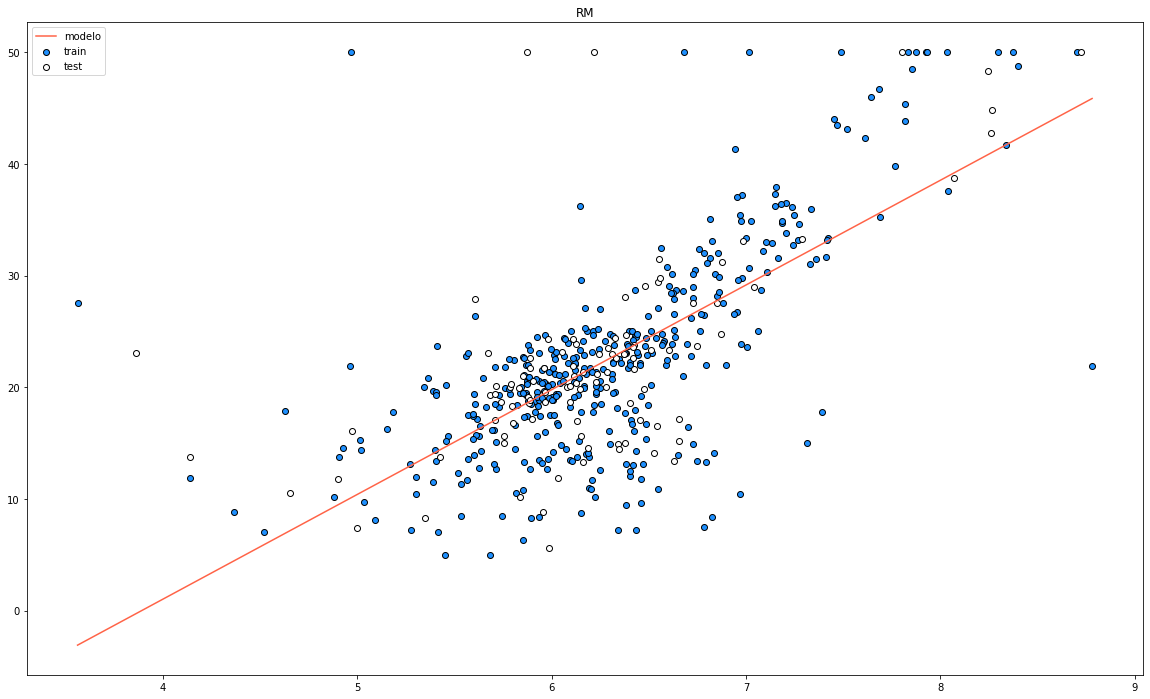

In [ ]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

fig = plt.figure(figsize=(20,12))
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

In [ ]:
model.predict(np.array([[0], [1], [2]]))#otra forma .reshape(-1, 1)

array([-36.47618963, -27.09980531, -17.723421  ])

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 4.3e+01
Test error: 4.7e+01


In [ ]:
train_errors = []
test_errors = []
params = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train, y_train)

    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)

    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

    # parameters (saved for later...):
    lr = model.named_steps['linearregression']
    params.append(lr.coef_)

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
# 1. Resolver acá.

In [ ]:
# 2. Graficar curvas de error acá.

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'ZN')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [ ]:
# 2. Resolver acá.

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
